# 1.5 Обработка данных в Python. Библиотека Pandas  
*Выполнение заданий представлено Кузиной Екатериной*

In [1]:
import numpy as np
import pandas as pd

In [67]:
df = pd.read_csv('/content/ds_salaries.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [73]:
df.count()

experience_level    607
job_title           607
salary_in_usd       607
company_location    607
company_size        607
dtype: int64

In [74]:
df = df[['experience_level', 'job_title', 'salary_in_usd', 'company_location', 'company_size']]
df.head(2)

,experience_level,job_title,salary_in_usd,company_location,company_size
0,MI,Data Scientist,79833,DE,L
1,SE,Machine Learning Scientist,260000,JP,S


### 1. Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)

In [44]:
jobs = df['job_title'].unique()
jobs

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [20]:
import re

In [79]:
df['job_category'] = df['job_title'].apply(lambda x: \
                                           'Manager' if re.search('(Manager)|(Consultant)|(Director)|(Head of)', x) else \
                                           'DS' if re.search('(Scientist)|(ML)|(NLP)', x) else \
                                           'CV' if re.search('(Vision)', x) else \
                                           'BI' if re.search('(BI)|(Financial)', x) else \
                                           'DE' if re.search('(Engineer)|(Developer)|(Architect)|(Specialist)', x) else \
                                           'DA' if re.search('Analy', x) else \
                                           'Other'
)

In [80]:
df.head()

,experience_level,job_title,salary_in_usd,company_location,company_size,job_category
0,MI,Data Scientist,79833,DE,L,DS
1,SE,Machine Learning Scientist,260000,JP,S,DS
2,SE,Big Data Engineer,109024,GB,M,DE
3,MI,Product Data Analyst,20000,HN,S,DA
4,SE,Machine Learning Engineer,150000,US,L,DE


In [98]:
import seaborn as sns
from matplotlib import pyplot as plt

### 2. Какая средняя и медианная зарплата по группам вакансий?

In [90]:
median_in_groups = df.groupby(by='job_category')['salary_in_usd'].mean().reset_index()
median_in_groups

,job_category,salary_in_usd
0,BI,124816.375000
1,CV,58767.100000
2,DA,93726.017857
3,DE,114822.244444
4,DS,114883.074627
5,Manager,140289.960784


In [96]:
mean_in_groups = df.groupby(by='job_category')['salary_in_usd'].median().reset_index()
mean_in_groups

,job_category,salary_in_usd
0,BI,99000.0
1,CV,44304.5
2,DA,90320.0
3,DE,104702.0
4,DS,104702.0
5,Manager,141846.0


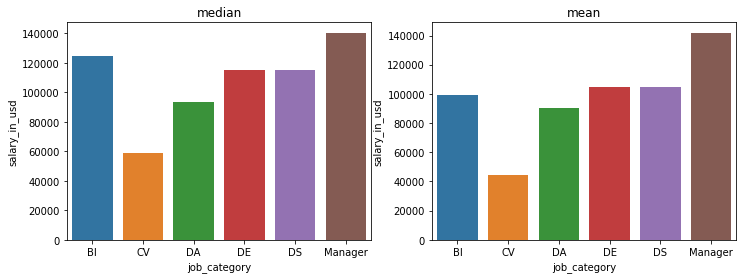

In [105]:
f, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].set_title('median')
axs[1].set_title('mean')
sns.barplot(data = median_in_groups, x = 'job_category', y = 'salary_in_usd', ax = axs[0])
sns.barplot(data = mean_in_groups, x = 'job_category', y = 'salary_in_usd', ax = axs[1])
None

### 3. Какая средняя и медианная зарплата по каждому региону?

In [106]:
median_by_region = df.groupby(by='company_location')['salary_in_usd'].median().reset_index()
mean_by_region = df.groupby(by='company_location')['salary_in_usd'].mean().reset_index()

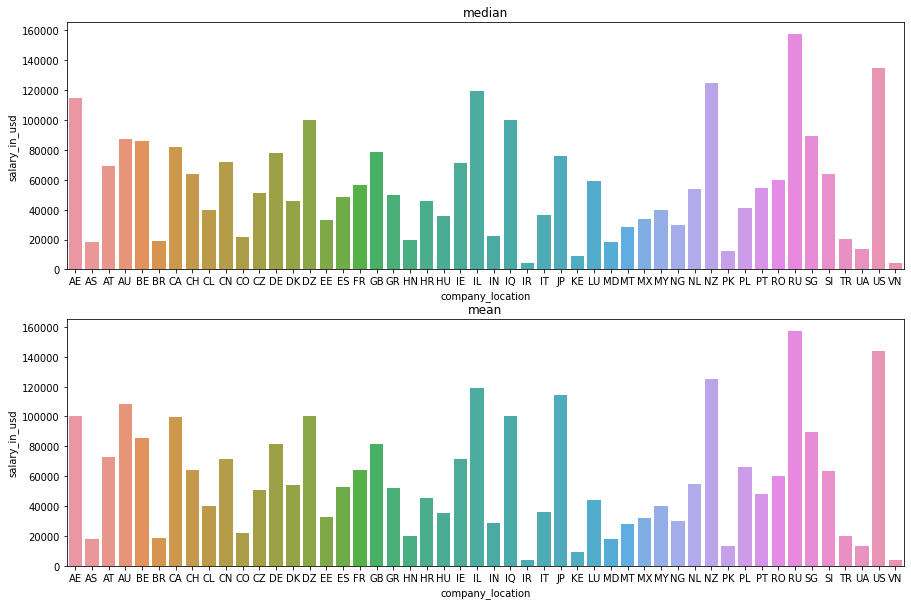

In [109]:
f, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].set_title('median')
axs[1].set_title('mean')
sns.barplot(data = median_by_region, x = 'company_location', y = 'salary_in_usd', ax = axs[0])
sns.barplot(data = mean_by_region, x = 'company_location', y = 'salary_in_usd', ax = axs[1])
None

### 4. Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?

In [118]:
mean_in_groups.loc[[mean_in_groups['salary_in_usd'].idxmax()]]

,job_category,salary_in_usd
5,Manager,141846.0


### 5. Какое процентное соотношение каждого региона по вакансиям от всех вакансий?

In [130]:
percentage =  df.groupby(by='company_location')['job_title'].count()
n_vacs = percentage.sum()
percentage = percentage.apply(lambda x: (x/n_vacs)*100)
percentage.sum()

100.0

In [132]:
for i, v in percentage.items():
  print('{}: {:5.2f}%'.format(i,v))

AE:  0.49%
AS:  0.16%
AT:  0.66%
AU:  0.49%
BE:  0.33%
BR:  0.49%
CA:  4.94%
CH:  0.33%
CL:  0.16%
CN:  0.33%
CO:  0.16%
CZ:  0.33%
DE:  4.61%
DK:  0.49%
DZ:  0.16%
EE:  0.16%
ES:  2.31%
FR:  2.47%
GB:  7.74%
GR:  1.81%
HN:  0.16%
HR:  0.16%
HU:  0.16%
IE:  0.16%
IL:  0.16%
IN:  3.95%
IQ:  0.16%
IR:  0.16%
IT:  0.33%
JP:  0.99%
KE:  0.16%
LU:  0.49%
MD:  0.16%
MT:  0.16%
MX:  0.49%
MY:  0.16%
NG:  0.33%
NL:  0.66%
NZ:  0.16%
PK:  0.49%
PL:  0.66%
PT:  0.66%
RO:  0.16%
RU:  0.33%
SG:  0.16%
SI:  0.33%
TR:  0.49%
UA:  0.16%
US: 58.48%
VN:  0.16%


In [ ]:
percentage.reset_index()

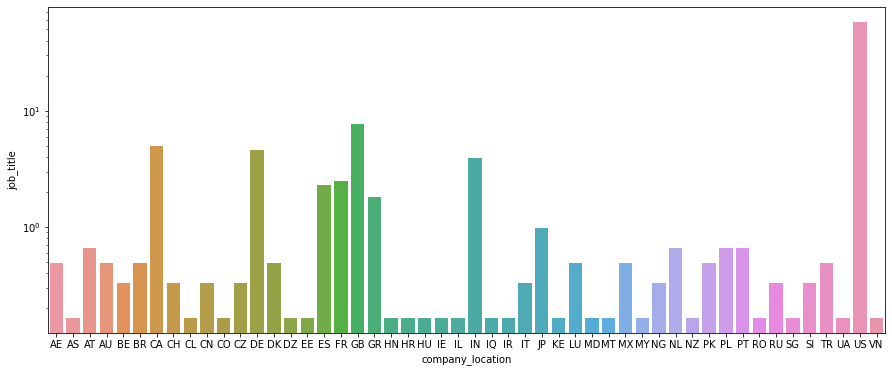

In [139]:
f = plt.figure(figsize=(15, 6))
ax = plt.gca()
ax.set_yscale('log')
sns.barplot(data = percentage.reset_index(), x = 'company_location', y = 'job_title', ax = ax)
None

### 6. Какая корреляция уровня опыта от зарплаты?

In [142]:
df['experience_level'] = df['experience_level'].apply(lambda x: 1 if x == 'EN' else \
                                                                2 if x ==  'MI' else \
                                                                3 if x ==  'SE' else \
                                                                4 if x ==  'EX' else 0
                                                                )

In [150]:
corr = df[['experience_level', 'salary_in_usd']].corr(method='kendall')

In [151]:
print('Корреляция уровня опыта и зарплаты: {:3.2f}'.format(corr['salary_in_usd']['experience_level']))

Корреляция уровня опыта и зарплаты: 0.44


### 7. Сколько должностей в наборе данных?

In [152]:
df['job_title'].count()

607

### 8. Какие 10 наиболее часто встречающихся должностей?

In [171]:
titles = df.groupby(by='job_title')['experience_level'].count().reset_index()
titles = titles.rename(columns={'experience_level': 'number_of_vacs'})
titles.sort_values(by=['number_of_vacs'], ascending=False, ignore_index=True)[:10]

,job_title,number_of_vacs
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Director of Data Science,7
